# Когортный анализ

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Список установок (каждая из которых имеет свой уникальный номер install id), которые пришли от каждой кампании (campaign id) с указанием даты (install date);

Список заказов, которые пришли от каждой установки, с указанием даты заказа (purchase date) и суммы заказа (revenue).

In [26]:
FILE_NAME = 'id кампании vs количество заказов, разбитые по дням после установки.xlsx'

install = pd.read_excel(FILE_NAME, sheet_name=1)
purchase = pd.read_excel(FILE_NAME,
                         sheet_name=2,
                         skiprows=2,
                         usecols=range(4),
                         nrows=23)

In [31]:
install.head()

,install id,campaign id,date of install
0,1,1,2019-06-01
1,2,1,2019-06-01
2,3,1,2019-06-02
3,4,1,2019-06-02
4,5,1,2019-06-03


In [32]:
purchase.head()

,install id,event type,date of event,ammount
0,1,purchase,2019-06-01,13.959777
1,1,purchase,2019-06-02,12.004638
2,2,purchase,2019-06-01,12.499569
3,3,purchase,2019-06-03,19.521913
4,4,purchase,2019-06-02,19.486585


In [137]:
df = purchase.merge(install, on='install id')

In [138]:
df['purchases since install date'] = df['date of event'] - df['date of install']

In [66]:
# df['install_day'] = df['date of install'].astype('datetime64[D]')
# df['purchase_day'] = df['date of event'].astype('datetime64[D]')

In [141]:
grouped_by_cohorts = df.groupby(['campaign id', 'purchases since install date']) \
                     .agg({'install id': 'nunique', 'ammount': 'sum'}) \
                     .reset_index()

In [142]:
purchases_per_user_pivot = grouped_by_cohorts.pivot_table(index='campaign id',
                                                        columns='purchases since install date',
                                                        values='install id',
                                                        aggfunc='sum') 

In [170]:
purchases_per_user_pivot #.style.format('{:.0f}')#.set_caption("purchases since install date")

purchases since install date,0 days,1 days,2 days
campaign id,,,
1,6.0,6.0,1.0
2,NaN,5.0,2.0
3,3.0,NaN,NaN


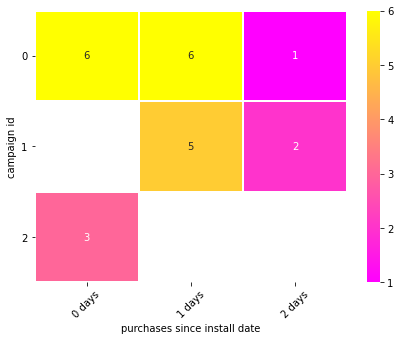

In [208]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(purchases_per_user_pivot,
            annot=True,
            fmt='.0f',
            linewidths=1,
            cmap='spring'
           )
ax.set_xticklabels([f'{x.days} days' for x in
                    purchases_per_user_pivot.columns], rotation=45)
ax.set_yticklabels(range(3), rotation=0);

In [73]:
def get_cohort_index(df, columns):
    month_diff = df[columns[0]].dt.month - df[columns[1]].dt.month
    day_diff = df[columns[0]].dt.day - df[columns[1]].dt.day
    return month_diff + day_diff

In [88]:
# df['cohort_index'] = get_cohort_index(df, ['date of event', 'date of install'])